In [3]:
import pandas as pd

data = pd.read_csv('Mall_Customers.csv')
print(data.head())
def categorize_spending_score(score):
    if score > 85:
        return 'VH'
    elif 65 <= score <= 84:
        return 'H'
    elif 40 <= score <= 64:
        return 'M'
    else:
        return 'L'

data['Spending_Score_Category'] = data['Spending Score (1-100)'].apply(categorize_spending_score)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
data_without_spending = data.drop(columns=['Spending Score (1-100)'])

/var/folders/ll/5bppzxkj0sl90zfnck2_r4vh0000gn/T/ipykernel_54073/3474189327.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, method='single')


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [192.5, 192.5, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [295.0, 295.0, 314.375, 314.375],
  [355.0, 355.0, 365.0, 365.0],
  [304.6875, 304.6875, 360.0, 360.0],
  [280.0, 280.0, 332.34375, 332.34375],
  [260.0, 260.0, 306.171875, 306.171875],
  [211.25, 211.25, 283.0859375, 283.0859375],
  [175.0, 175.0, 247.16796875, 247.16796875],
  [152.5, 152.5, 211.083984375, 211.083984375],
  [120.0, 120.0, 181.7919921875,

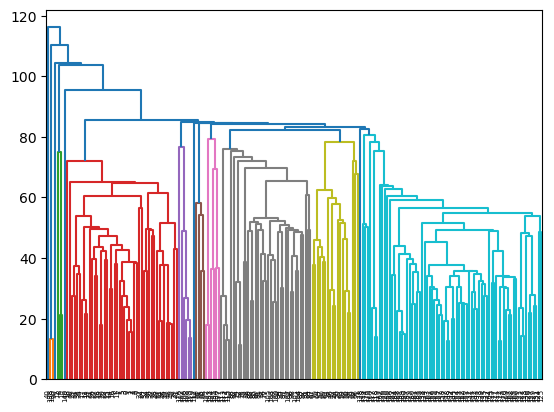

In [5]:
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
data_encoded = pd.get_dummies(data_without_spending, drop_first=True)

dist_matrix = pairwise_distances(data_encoded, metric='euclidean')

Z = linkage(dist_matrix, method='single')

dendrogram(Z)

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster_1 = AgglomerativeClustering(n_clusters=100, linkage='single').fit(data_encoded)
cluster_2 = AgglomerativeClustering(n_clusters=50, linkage='single').fit(data_encoded)


In [34]:
import numpy as np

def calculate_purity(true_labels, predicted_labels):
    total_samples = len(true_labels)
    purity_score = 0

    for cluster in np.unique(predicted_labels):
        cluster_indices = np.where(predicted_labels == cluster)[0]
    
        cluster_true_labels = true_labels[cluster_indices]
        unique_labels, counts = np.unique(cluster_true_labels, return_counts=True)
        
        most_common_count = np.max(counts)
        
        purity_score += most_common_count
    
    return purity_score / total_samples

purity_1 = calculate_purity(data['Spending_Score_Category'], cluster_1.labels_)
purity_2 = calculate_purity(data['Spending_Score_Category'], cluster_2.labels_)

print(f"Purity for Clustering 1: {purity_1}")
print(f"Purity for Clustering 2: {purity_2}")


Purity for Clustering 1: 0.81
Purity for Clustering 2: 0.705
